# LUX HDF5 Demo

## Imports

In [2]:
import h5lux_PyMod as h5lux
import h5py

%pylab inline
font = {'family':'normal','size':18}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


## Loading evt .hdf5 file

### Expore the file with built-in h5py

In [4]:
evt_file = 'files/lux10_20130611T0605_f000001_eb00014.evt.hdf5'

fevt = h5py.File(evt_file, 'r')

print fevt.keys()

[u'ch_map', u'daq_settings', u'events', u'evt_settings', u'livetime', u'trigger_settings']


In [5]:
print 'Livetime latch:\n', fevt['livetime']['latch_samples'][:]

Livetime latch:
[[ 101975475]
 [ 143361525]
 [ 534948781]
 [ 694612517]
 [ 807613057]
 [ 866997207]
 [1130652013]
 [1337204727]
 [1494123332]
 [1522693403]
 [1619022393]
 [1798320703]
 [1838197819]
 [2102059455]
 [2182567103]
 [2191749936]
 [2258346824]
 [2363423078]]


In [11]:
luxstamps = fevt['events'].keys()
print 'Number of events:', len(luxstamps)
print '\nFirst 10 luxstamps:\n','\n'.join(luxstamps[:10])

Number of events: 275

First 10 luxstamps:
108623102220985340
108623102414617700
108623102430029740
108623102451527840
108623102460129680
108623102465191220
108623102472832980
108623102517661310
108623102746907880
108623102983788660


In [7]:
print fevt['events']['108623102460129680']['ch']['10'].keys()
print ''
print fevt['events']['108623102460129680'].keys()

[u'pod_baseline_mV', u'pod_length_samples', u'pod_mV', u'pod_phe_per_sample', u'pod_start_samples', u'pod_time_samples']

[u'ch', u'sumpod_length_samples', u'sumpod_phe_per_sample', u'sumpod_start_samples', u'sumpod_time_samples', u'trigger']


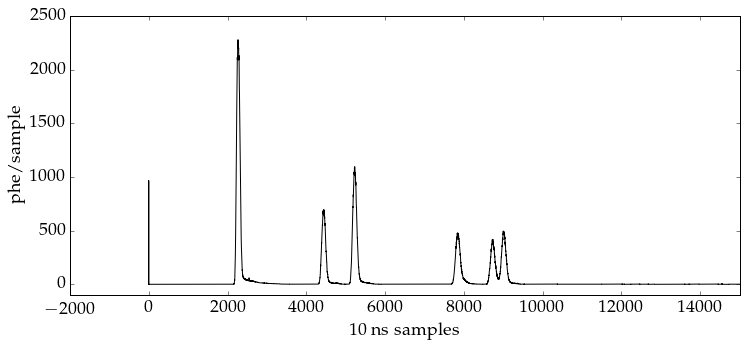

In [8]:
ee = luxstamps[2]
t = fevt['events'][ee]['sumpod_time_samples'][:]
y = fevt['events'][ee]['sumpod_phe_per_sample'][:]

fig = plt.figure(figsize=(12.,5.))
ax = plt.gca()
ax.plot(t,y,'k-')
ax.set_xlim([-2000,15000])
ax.set_ylim([-100,2500])
ax.set_xlabel('10 ns samples')
ax.set_ylabel('phe/sample')

## RQs

In [20]:
rq_file = 'files/lux10_20150214T2255_f000107_cp12600.rq.hdf5'

frq = h5py.File(rq_file, 'r')

print frq.keys()

[u'livetime', u'rqs', u'settings']


In [14]:
frq['rqs'].keys()

[u'adc_ppe',
 u'adc_sds',
 u'aft_t05_samples',
 u'aft_t0_samples',
 u'aft_t1_samples',
 u'aft_t25_samples',
 u'aft_t2_samples',
 u'aft_t75_samples',
 u'aft_t95_samples',
 u'aft_tlx_samples',
 u'aft_trx_samples',
 u'amis1_fraction',
 u'baseline_daq_mV',
 u'chi2',
 u'cor_x_cm',
 u'cor_y_cm',
 u'correction_electron_lifetime',
 u'correction_s1_xy_dependence',
 u'correction_s1_xy_dependence_bot',
 u'correction_s1_xyz_dependence',
 u'correction_s1_z_dependence',
 u'correction_s1_z_dependence_bot',
 u'correction_s2_xy_dependence',
 u'correction_s2_xy_dependence_bot',
 u'daq_saturation_flag',
 u'energy_bottom_poor_fit',
 u'energy_found_1eS2_flag',
 u'energy_keVee_all',
 u'energy_keVee_bot',
 u'energy_keVnr_all',
 u'energy_keVnr_bot',
 u'event_number',
 u'event_timestamp_samples',
 u'exp_fit_amplitude_phe_per_sample',
 u'exp_fit_chisq',
 u'exp_fit_dof',
 u'exp_fit_tau_fall_samples',
 u'exp_fit_tau_rise_samples',
 u'exp_fit_time_offset_samples',
 u'file_number',
 u'full_evt_area_phe',
 u'gaus_fi

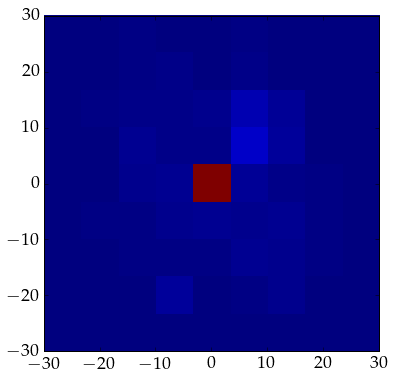

In [47]:
fig = plt.figure(figsize=(6.,6.))
ax = plt.gca()

bins = np.linspace(-30,30,10)

x_cm = np.array(frq['rqs']['cor_x_cm'][:])
x_cm = x_cm.flatten()
y_cm = np.array(frq['rqs']['cor_y_cm'][:])
y_cm = y_cm.flatten()

# plt.plot(frq['rqs']['cor_x_cm'][:],frq['rqs']['cor_y_cm'][:],'ko',alpha=0.5);
plt.hist2d(x_cm,y_cm,bins=bins);